In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
boston_df = keras.datasets.boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_df.load_data()

57344/57026 [==============================] - 1s 20us/step


In [5]:
#Shuffle training set
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]
order

array([133, 229,  58, 164, 317, 331, 154, 303, 209, 217, 239,  45, 318,
        48,  86, 207, 387,   2,  76,  75,  73,  14, 131, 151, 263,   7,
       340,  18,  25, 297,  63, 197, 287, 378, 310, 172,  10, 204, 146,
       350,  62, 368, 137, 357, 236, 119, 162, 271,  35, 382, 315, 371,
       105,   5,  47, 341, 291, 305, 240,  38, 261, 189, 286, 205, 193,
       328, 361,  80, 339, 316, 301, 401, 347, 295, 157, 349, 192, 177,
        53,  50,  92, 166, 247, 210, 246, 358, 325, 330, 276,  89, 356,
       304, 235, 168, 326, 338, 293, 152, 190, 270, 343,  57, 224, 108,
       254, 225,  26, 403, 216,  98, 324, 198, 388,  78, 262, 148, 103,
       394,  30, 351, 400, 226, 202, 256,  70, 110,  44, 259,  36, 143,
       250,  66, 196, 386, 313, 373, 112,  95, 314, 296, 182, 129,   9,
        77, 248,  54, 365,  20, 392, 274,  15,  11, 384, 153, 355, 156,
       237, 101, 155, 266, 227, 188, 272, 173, 329, 277, 169,  97, 397,
       265, 130, 223, 211,  16,  39, 158,  79, 284, 311, 345, 28

In [6]:
print("Training set: {}".format(train_data.shape))
print("Test set: {}".format(test_data.shape))

Training set: (404, 13)
Test set: (102, 13)


In [7]:
print(train_data[0])

[  7.87500000e-02   4.50000000e+01   3.44000000e+00   0.00000000e+00
   4.37000000e-01   6.78200000e+00   4.11000000e+01   3.78860000e+00
   5.00000000e+00   3.98000000e+02   1.52000000e+01   3.93870000e+02
   6.68000000e+00]


In [9]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


In [10]:
# Normalize features
# Test data is *not* used when calculating the mean and std.

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean)/std
test_data = (test_data - mean)/std

print(train_data[0])

[-0.39725269  1.41205707 -1.12664623 -0.25683275 -1.027385    0.72635358
 -1.00016413  0.02383449 -0.51114231 -0.04753316 -1.49067405  0.41584124
 -0.83648691]


In [11]:
# Creating the model

def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(train_data.shape[1],)),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])
    
    optimizer = tf.train.RMSPropOptimizer(0.001)
    
    model.compile(loss='mse', optimizer= optimizer, metrics=["mae"])
    
    return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Display training progress by printing a single dot for each completed epoch.
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print(epoch,' ', end='')
        
EPOCHS = 500

# Store training sets
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])

            


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99  
100  101  102  103  104  105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144  145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160  161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176  177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192  193  194  195  196  197  198  199  
200  201  202  203  204  205  206  207  208  209  210  211  212  213  214  215  216  217  218  219  220  22

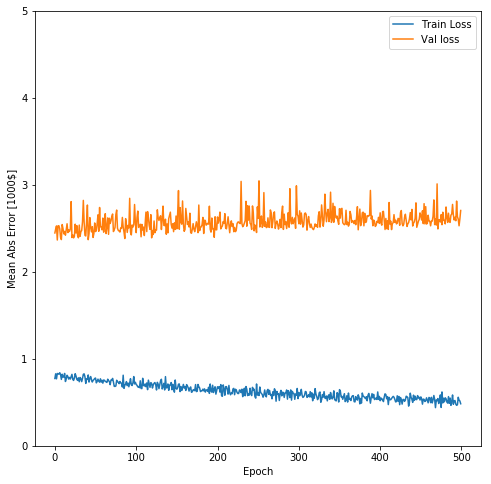

In [17]:
def plot_history(history):
  plt.figure(figsize=(8,8))
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), 
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0,5])

plot_history(history)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99  
100  101  102  103  104  105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144  145  146  147  148  

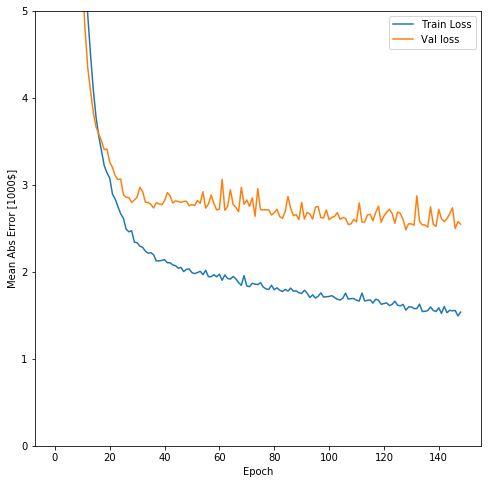

In [19]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

In [25]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:6.3f}".format(mae * 1000))

Testing set Mean Abs Error: $2885.029


In [26]:
test_pred = model.predict(test_data).flatten()
print(test_pred)

[  9.15136719  18.46960831  21.47415924  34.17113495  24.43154907
  21.43563843  25.00369453  21.2048645   18.4432373   22.35964966
  16.75764847  15.70281029  15.83195686  40.92861176  19.3818779
  20.10513306  25.64999771  18.41335869  20.32141304  27.40302277
  12.83407402  14.48885536  20.42747116  16.02898026  19.1818409
  26.30557442  29.31016922  29.30767059  11.12194252  19.46509743
  19.79852486  14.95425606  33.35674286  23.98840523  18.92312241
   8.06853676  16.19265366  16.36893845  19.40549088  24.86392593
  30.09845734  26.82116127  13.70649147  40.84158707  29.1786747
  25.79868507  26.69727707  17.56884575  23.1042366   21.76242065
  33.39160156  19.9849453   11.42645168  15.36952972  33.41350555
  27.00107193  12.22990417  45.54950714  34.34427261  23.42240143
  25.6685524   16.40102005  14.89609051  19.53208733  22.52590942
  20.07275772  13.53525352  20.70471382  11.69814968   8.14492893
  26.25353432  28.46707535  26.66491318  12.8408947   23.82264519
  18.34958839